In [74]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, max_error
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.base import  BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [75]:
df = pd.read_csv("Data/Laptop_price.csv")
df = df.drop("Brand", axis=1)

In [76]:
df["RAM_Size"].unique(), df["Storage_Capacity"].unique()

(array([16,  4, 32,  8], dtype=int64), array([ 512, 1000,  256], dtype=int64))

In [77]:
df

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,3.830296,16,512,11.185147,2.641094,17395.093065
1,2.912833,4,1000,11.311372,3.260012,31607.605919
2,3.241627,4,256,11.853023,2.029061,9291.023542
3,3.806248,16,512,12.280360,4.573865,17436.728334
4,3.268097,32,1000,14.990877,4.193472,32917.990718
...,...,...,...,...,...,...
995,3.343584,4,1000,12.587095,3.162399,31593.668017
996,2.780555,8,256,12.679356,3.750265,9149.521832
997,3.200569,4,512,12.666315,3.392612,16552.404779
998,1.604182,8,256,11.215581,3.857613,9407.473459


In [78]:
corr_ = df.corr(numeric_only=True)
corr_["Price"].sort_values(ascending=False)

Price               1.000000
Storage_Capacity    0.997908
RAM_Size            0.061237
Weight              0.038417
Screen_Size        -0.026740
Processor_Speed    -0.050737
Name: Price, dtype: float64

<AxesSubplot: xlabel='Storage_Capacity', ylabel='Price'>

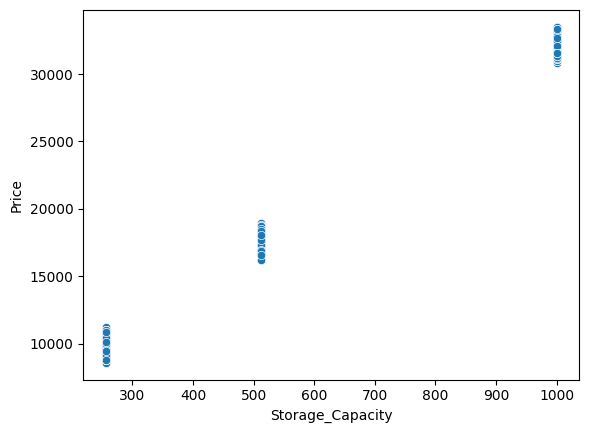

In [79]:
sns.scatterplot(data=df, x="Storage_Capacity", y="Price")

In [80]:
df.describe()

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.750611,15.500000,584.576000,14.056790,3.466919,19604.187963
std,0.731796,10.988665,313.438517,1.705882,0.866541,9406.064880
min,1.511580,4.000000,256.000000,11.012111,2.000560,8570.012950
25%,2.089246,8.000000,256.000000,12.635523,2.717211,10114.012948
50%,2.760885,16.000000,512.000000,14.099643,3.464630,17287.241878
75%,3.362610,32.000000,1000.000000,15.528590,4.212583,31566.214754
max,3.998534,32.000000,1000.000000,16.985737,4.990728,33503.935037


In [90]:
scaler = StandardScaler()
df["Price"] = df["Price"].values.reshape(-1, 1)
df["Price"] = scaler.fit_transform(df[["Price"]])
df

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,3.830296,16,512,11.185147,2.641094,-0.234976
1,2.912833,4,1000,11.311372,3.260012,1.276775
2,3.241627,4,256,11.853023,2.029061,-1.096986
3,3.806248,16,512,12.280360,4.573865,-0.230547
4,3.268097,32,1000,14.990877,4.193472,1.416157
...,...,...,...,...,...,...
995,3.343584,4,1000,12.587095,3.162399,1.275292
996,2.780555,8,256,12.679356,3.750265,-1.112038
997,3.200569,4,512,12.666315,3.392612,-0.324611
998,1.604182,8,256,11.215581,3.857613,-1.084600


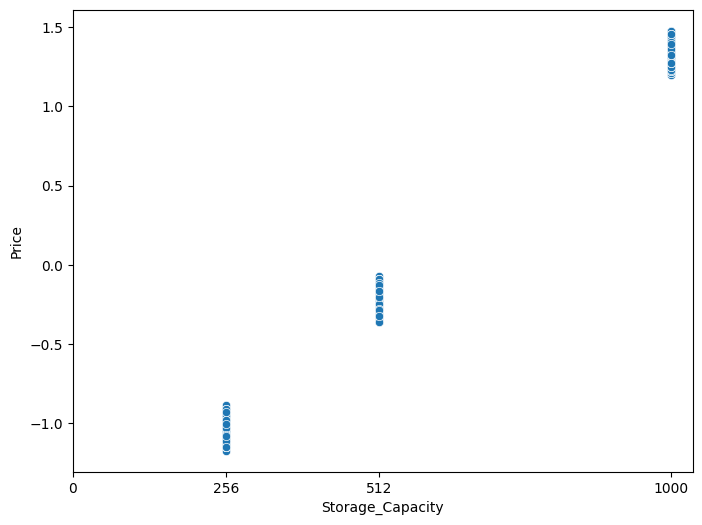

In [93]:
custom_xticks = [0, 256, 512, 1000]
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Storage_Capacity", y="Price")
plt.xticks(custom_xticks)
plt.show()

In [137]:

X = df.drop("Price", axis=1)
y = df["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [138]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg.score(X_train, y_train)

0.9995499024762504

In [158]:
y_pred = lin_reg.predict(X_test)

In [159]:
r2_score(y_test, y_pred).round(4), mean_squared_error(y_test, y_pred).round(4), max_error(y_test, y_pred).round(4), mean_absolute_error(y_test, y_pred).round(4)

(0.9996, 0.0004, 0.0511, 0.016)

In [148]:
X_test.shape, y_test.shape, y_pred.shape, X_train.shape, y_train.shape

((250, 5), (250,), (250,), (750, 5), (750,))

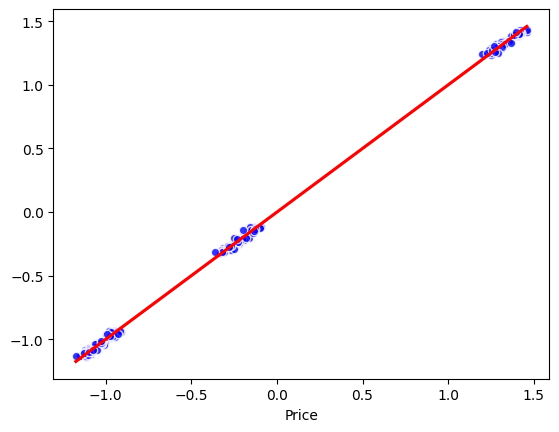

In [165]:
sns.regplot(x=y_test, y=y_pred, scatter_kws={"color": "blue", "edgecolor": "white"}, line_kws={"color": "red"}) 
plt.show()